# import libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D #for 3D plotting

tf.random.set_seed(777) 
print(tf.__version__)

2.1.0


# data settings

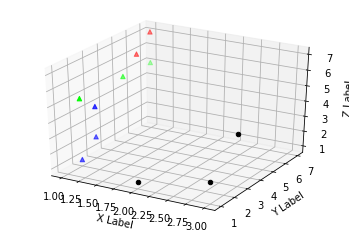

In [2]:
#train data
x_train = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_train = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#test data
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

#x_train data ➝ x1, x2, x3(for plotting @ x, y, z axis)
x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]
x3 = [x[2] for x in x_train]

#figure settings
fig = plt.figure() #setting up a figure
ax = fig.add_subplot(111, projection = '3d') #1*1 size, 1st canvas, 3d surface
ax.scatter(x1, x2, x3, c = y_train, marker = '^') #ax.scatter(x, y, z)
                                                  #num of colors : 3

ax.scatter(x_test[0][0], x_test[0][1], x_test[0][2], c = "black", marker = 'o')
ax.scatter(x_test[1][0], x_test[1][1], x_test[1][2], c = "black", marker = 'o')
ax.scatter(x_test[2][0], x_test[2][1], x_test[2][2], c = "black", marker = 'o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

# Weight and bias settings

In [3]:
W = tf.Variable(tf.random.normal([3, 3]))
b = tf.Variable(tf.random.normal([3]))
variables = [W, b]

# hypothesis(softmax)

In [4]:
def softmax_fn(features):
    hypothesis = tf.nn.softmax(tf.matmul(features, W) + b)
    return hypothesis

# cost function(cross entropy)

In [5]:
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(-tf.reduce_sum(labels * tf.math.log(hypothesis), axis=1))
    return cost

# learning rate decay 
* initial_learning_rate
* decay_steps
* decay_rate
* staircase

from : https://www.tensorflow.org/guide/keras/train_and_evaluate

In [6]:
#is_decay = True
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                                                          decay_steps = 1000,
                                                          decay_rate = 0.96,
                                                          staircase = True)
    
if(True):
    optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate = initial_learning_rate)

# cost minimization

In [7]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(softmax_fn(features), features, labels)
    return tape.gradient(loss_value, variables)

# accuracy

In [8]:
def accuracy_fn(hypothesis, labels):
    prediction = tf.argmax(hypothesis, 1)
    is_correct = tf.equal(prediction, tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    return accuracy

# train

In [9]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels in iter(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads = grad(softmax_fn(features), features, labels)
        optimizer.apply_gradients(grads_and_vars = zip(grads, variables))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(softmax_fn(features),features,labels)))
x_test = tf.cast(x_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)
test_acc = accuracy_fn(softmax_fn(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 7.8510
Iter: 100, Loss: 0.6915
Iter: 200, Loss: 0.5892
Iter: 300, Loss: 0.5326
Iter: 400, Loss: 0.4927
Iter: 500, Loss: 0.4615
Iter: 600, Loss: 0.4358
Iter: 700, Loss: 0.4139
Iter: 800, Loss: 0.3951
Iter: 900, Loss: 0.3785
Iter: 1000, Loss: 0.3638
Testset Accuracy: 1.0000
